<a href="https://colab.research.google.com/github/yakupilyas/GoogleColabIntro/blob/main/Example1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Öncelikle OpenCV kütüphanemizi ekliyoruz. 🠗🠗🠗***

In [ ]:
!pip install -q watermark

In [ ]:
%load_ext watermark

%watermark -v -p cv2

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.7.10
IPython version      : 5.5.0

cv2: 4.1.2



In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pylab import rcParams

%matplotlib inline

sns.set_style("white")

rcParams['figure.figsize'] = 12, 10

***Google Drive üzerinden şeklimizi ekliyoruz. 🠗🠗🠗***

In [ ]:
!gdown --id 1A004WP2PhthJsYcUN_fKAXLEEQucCe6i

Downloading...
From: https://drive.google.com/uc?id=1A004WP2PhthJsYcUN_fKAXLEEQucCe6i
To: /content/dragon1.jpg
100% 49.2k/49.2k [00:00<00:00, 43.1MB/s]


***imread komutu ile eklediğimiz resmi tanıtıyoruz 🠗🠗🠗***

In [ ]:
img = cv2.imread(filename = 'dragon1.jpg', flags = cv2.IMREAD_COLOR)

***resmimizi rgb olarak gösteriyoruz. 🠗🠗🠗***

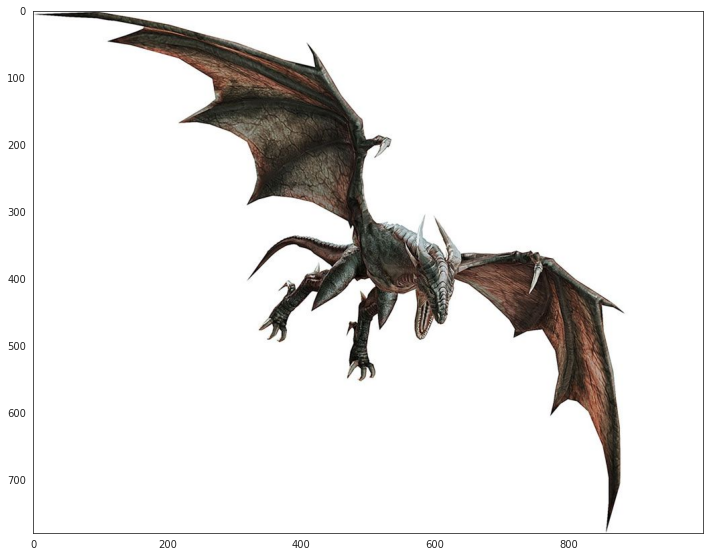

In [ ]:
plt.imshow(cv2.cvtColor(src = img, code = cv2.COLOR_BGR2RGB));

***resmimizin boyutunu üstüne ekleyeceğimiz background a göre düzenliyoruz. 🠗🠗🠗***

In [407]:
def show_image(image, show_axis=True):
 plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
 if not show_axis:
    plt.axis('off');

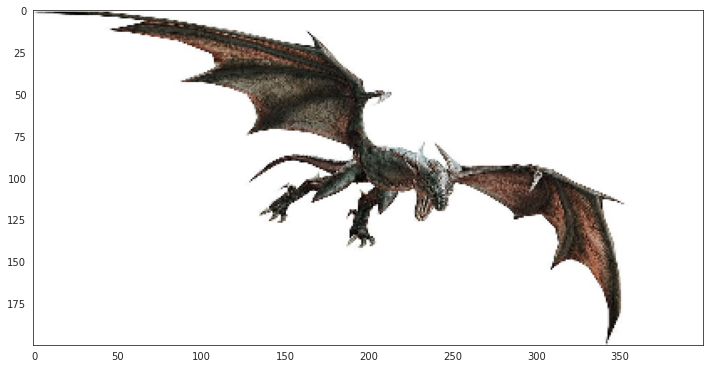

In [ ]:
resize_width, resize_height = 400, 200

resized = cv2.resize(
 src = img,
 dsize=(resize_width, resize_height),
 interpolation=cv2.INTER_LANCZOS4
)

show_image(resized)

***resmi kırpma işlemini gerçekleştirdiğimiz komut. 🠗🠗🠗***

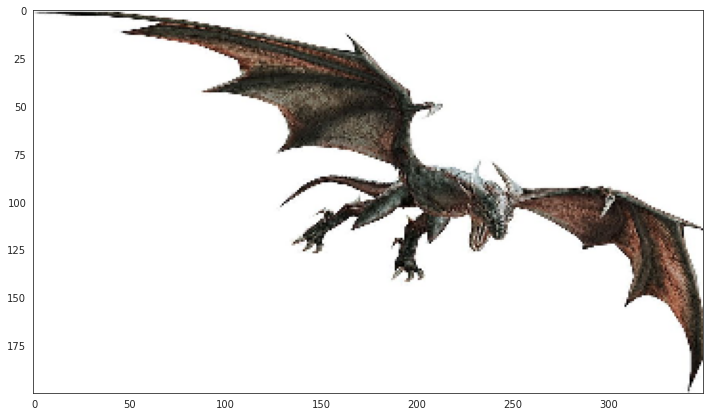

In [ ]:
cropped = resized[0:300, 0:350]

show_image(cropped)

***background olacak resmimizi google drive üzerinden ekliyoruz. 🠗🠗🠗***

In [ ]:
!gdown --id 1xLnaa5XdsFqTcEn_nq8-BqTeEAteOr0e

Downloading...
From: https://drive.google.com/uc?id=1xLnaa5XdsFqTcEn_nq8-BqTeEAteOr0e
To: /content/Tokat-Gaziosmanpasa-Universitesi-9-Sozlesmeli-Personel-Alimi-Yapacak.jpg
100% 135k/135k [00:00<00:00, 49.9MB/s]


***resmimizi background olarak tanımlıyoruz. 🠗🠗🠗***

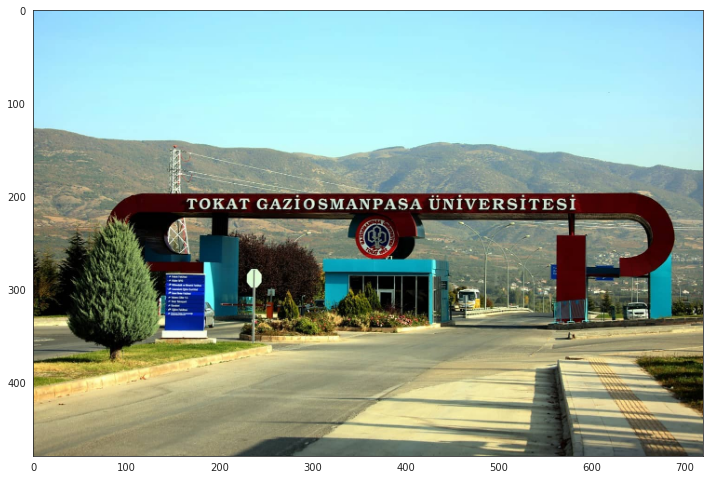

In [ ]:
background = cv2.imread('Tokat-Gaziosmanpasa-Universitesi-9-Sozlesmeli-Personel-Alimi-Yapacak.jpg', cv2.IMREAD_COLOR)
h, w, _ = background.shape

background = cv2.resize(background, (w // 2, h // 2))

show_image(background)

***burada kernel_len değerini değiştirerek arka planımızı blurlaştırabiliyoruz. 🠗🠗🠗***

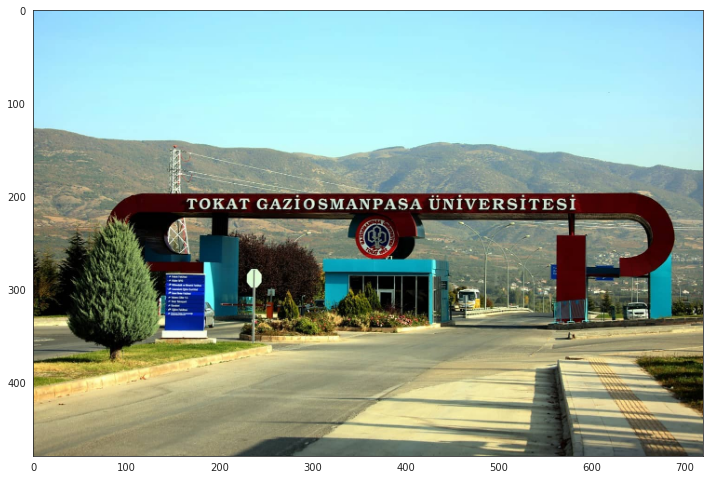

In [ ]:
kernel_len = 1
blurred_background = cv2.GaussianBlur(
src = background,
ksize = (kernel_len, kernel_len),
sigmaX = 120,
sigmaY = 45
)

show_image(blurred_background)

***önceki kırpmış oldugumuz resmin dış sınır hatlarını belirliyoruz. Resmin beyaz olan kısımlarını kırpıyoruz.🠗🠗🠗***

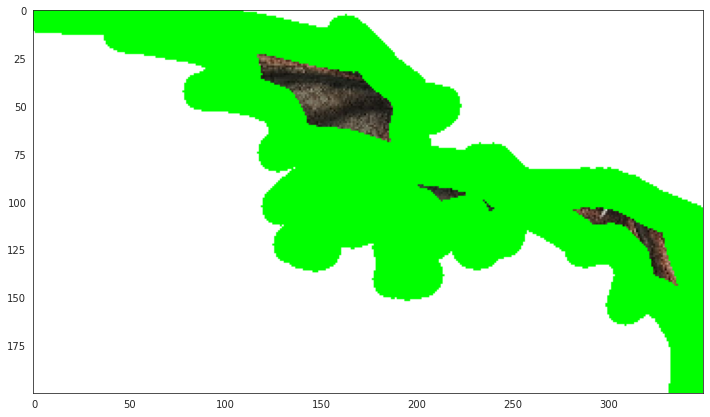

In [ ]:
gray = cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(
  src = gray,
  thresh = 225,
  maxval = 255, 
  type = cv2.THRESH_BINARY_INV
)

contours, _ = cv2.findContours(
  image = binary, 
  mode = cv2.RETR_EXTERNAL, 
  method = cv2.CHAIN_APPROX_SIMPLE
)

contour_img = cropped.copy()

show_image(
  cv2.drawContours(
    image = contour_img, 
    contours = contours, 
    contourIdx = -1, 
    color = (0, 255, 0), 
    thickness = 20
  )
)

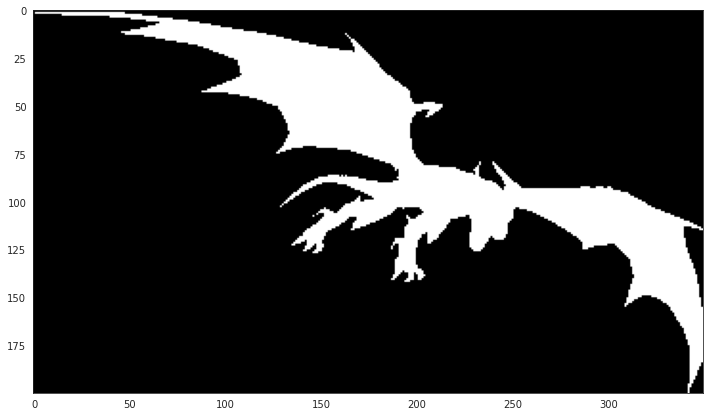

In [ ]:
mask = np.zeros_like(cropped)
mask = cv2.drawContours(mask, contours, -1, (255, 255, 255), cv2.FILLED)

show_image(mask)

In [ ]:
masked_dragon1 = cv2.bitwise_and(
  src1 = cropped, 
  src2 = cropped, 
  mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
)

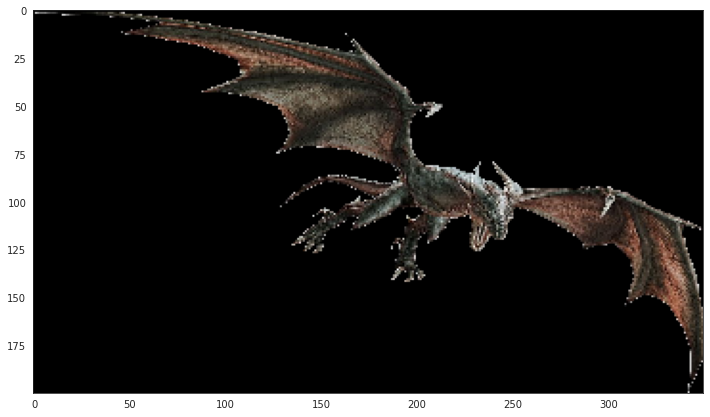

In [ ]:
show_image(masked_dragon1)

***sınırlarını belirlediğimiz resmi background resmimiz üzerindeki konumunu ayarlıyoruz. 🠗🠗🠗***

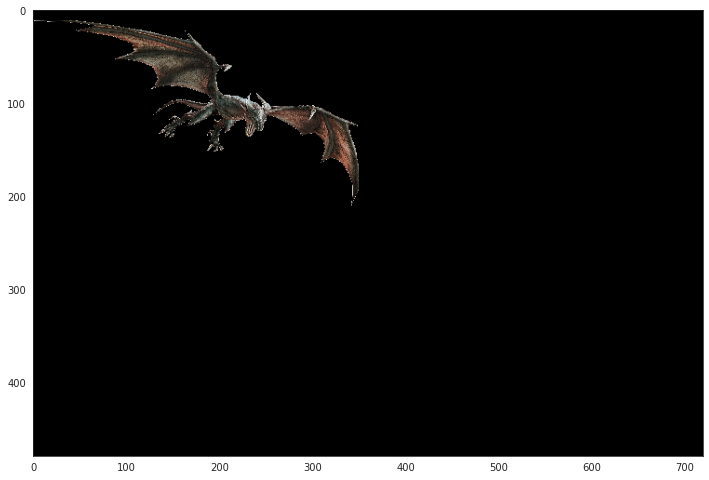

In [ ]:
new_mask = np.zeros_like(blurred_background)
new_mask[
  10: 10 + masked_dragon1.shape[0],
  0: 0 + masked_dragon1.shape[1]
] = masked_dragon1

show_image(new_mask)

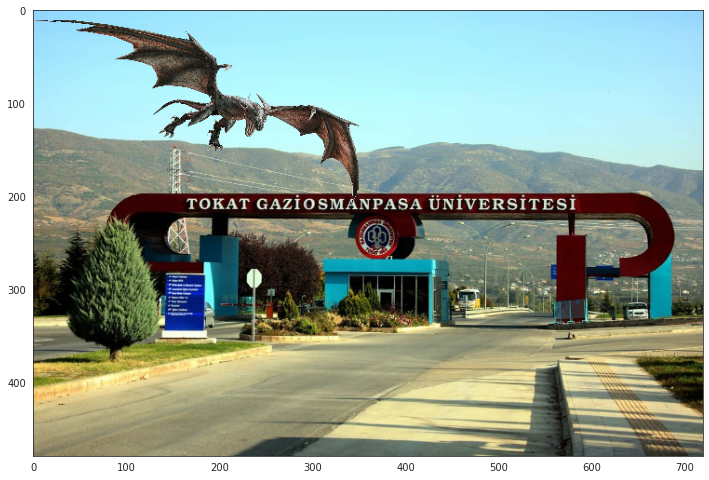

In [ ]:
_, alpha = cv2.threshold(
  src = cv2.cvtColor(new_mask, cv2.COLOR_RGB2GRAY), 
  thresh = 0, 
  maxval = 255, 
  type = cv2.THRESH_BINARY
)
b, g, r = cv2.split(new_mask)
alpha_image = cv2.merge((b, g, r, alpha))
final_image = blurred_background.copy()
alpha_s = alpha_image[:, :, 3] / 255.0
alpha_l = 1.0 - alpha_s

for c in range(0, 3):
  final_image[:, :, c] = (alpha_s * alpha_image[:, :, c] +\
                          alpha_l * final_image[:, :, c])
show_image(final_image)

***bu kod resim üzerinde noktalar oluşturmamızı sağlıyor. 🠗🠗🠗***

In [ ]:
image = final_image.copy()

eye_coordinates = [(1985, 690), (2025, 800)]

for ec in eye_coordinates:
  image = cv2.circle(
    img = image, 
    center = ec, 
    radius = 30, 
    color = (255, 0, 0), 
    thickness = -1
  )

show_image(image)

***oluşturduğumuz resmimizin üzerine yazı yazmamızı sağlayan kod. 🠗🠗🠗***

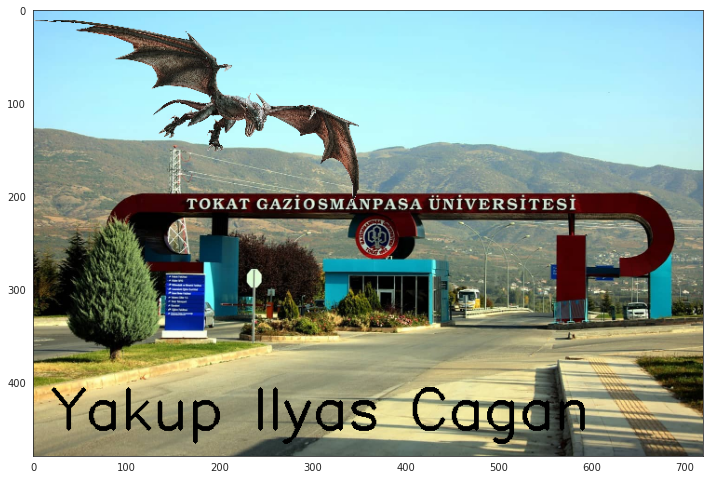

In [ ]:
final_img = image.copy()

cv2.putText(
  img = final_img,
  text = 'Yakup Ilyas Cagan', 
  org = (20, final_img.shape[0] - 30), 
  fontFace = cv2.FONT_HERSHEY_SIMPLEX, 
  fontScale = 2,
  color = (0, 0, 0),
  thickness = 3
)

show_image(final_img)

***resimizi gri olarak göstermemizi sağlayan kod. 🠗🠗🠗***

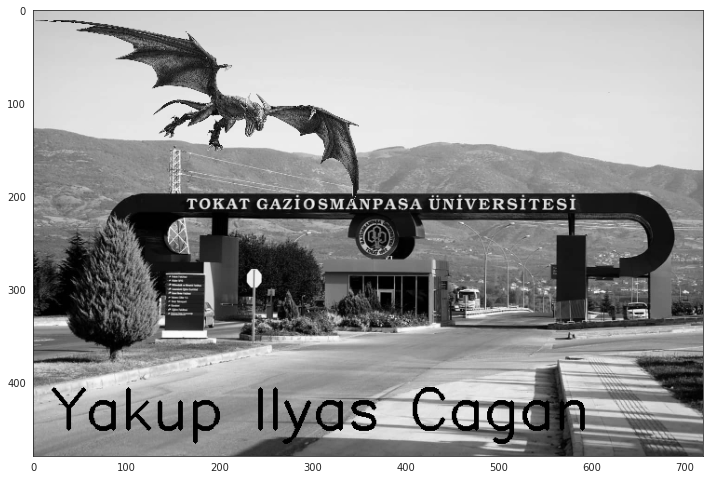

In [ ]:
plt.imshow(cv2.cvtColor(src = final_img, code = cv2.COLOR_BGR2GRAY), cmap = 'gray');

***resmimizi RGB olarak göstermemizi sağlayan kod. 🠗🠗🠗***

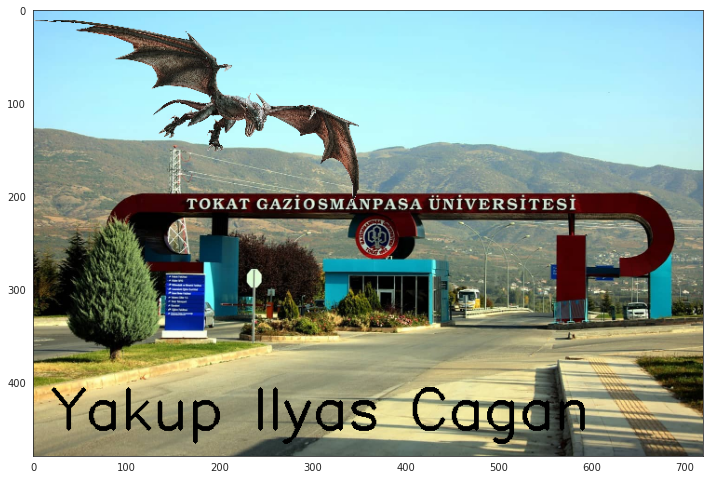

In [ ]:
plt.imshow(cv2.cvtColor(src = final_img, code = cv2.COLOR_BGR2RGB));

***resmimizi gerçek renk değerleri ile göstermemizi sağlayan kod. 🠗🠗🠗***

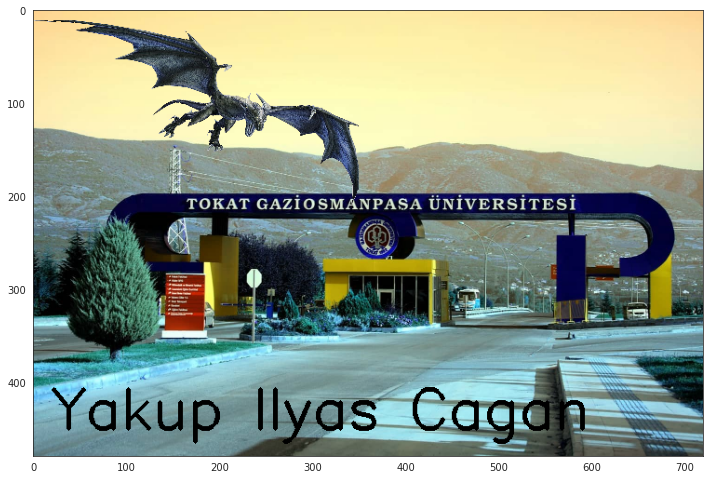

In [ ]:
plt.imshow(final_img);